## Analyzing general socioeconomics and its relation to student performances

### Based on results, infer ideas and concepts that influence student scores

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
print(df.shape) #size of data

df.describe() #statistics on numeric data of dataframe

(1000, 8)


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Given the summary above, let's say that the passing mark of the exam is 55. 

In [4]:
passMark = 55

In [5]:
df['Passed_Math'] = np.where(df['math score'] < passMark, 'F', 'P')
df['Passed_Reading'] = np.where(df['reading score'] < passMark, 'F', 'P')
df['Passed_Writing'] = np.where(df['writing score'] < passMark, 'F', 'P')

In [6]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed_Math,Passed_Reading,Passed_Writing
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F
4,male,group C,some college,standard,none,76,78,75,P,P,P
5,female,group B,associate's degree,standard,none,71,83,78,P,P,P
6,female,group B,some college,standard,completed,88,95,92,P,P,P
7,male,group B,some college,free/reduced,none,40,43,39,F,F,F
8,male,group D,high school,free/reduced,completed,64,64,67,P,P,P
9,female,group B,high school,free/reduced,none,38,60,50,F,P,F


#### Students Pass-Fail Math scores

In [7]:
percentMath = (df['Passed_Math']=='P').sum() / (len(df.index))
print('Math Score: %.2f%%' % (percentMath*100))

df.Passed_Math.value_counts()

Math Score: 77.90%


P    779
F    221
Name: Passed_Math, dtype: int64

#### Students Pass-Fail Reading scores

In [8]:
percentReading = (df['Passed_Reading']=='P').sum() / (len(df.index))
print('Reading Score: %.2f%%' % (percentReading*100))

df.Passed_Reading.value_counts()

Reading Score: 84.00%


P    840
F    160
Name: Passed_Reading, dtype: int64

#### Students Pass-Fail Writing scores

In [9]:
percentWriting = (df['Passed_Writing']=='P').sum() / len(df.index)
print('Writing Score: %.2f%%' % (percentWriting*100))

df.Passed_Writing.value_counts()

Writing Score: 79.70%


P    797
F    203
Name: Passed_Writing, dtype: int64

#### Considering that most institution's passing rates among classes is around 80%, the scores of the students reflect an average ratio of pass/fail

#### An indicator of good academic standing for a student is passing all classes. Retrieve stats of students whose scores all passed

In [10]:
df['All_Pass_Status'] = df.apply(lambda x: 'P' if x.Passed_Math == 'P' and x.Passed_Reading == 'P' and x.Passed_Writing == 'P' else 'F', axis=1)

In [11]:
percentStudentsPassed = (df['All_Pass_Status']=='P').sum() / len(df.index)
print("All Class Passed Percentage: %.2f%%" % (percentStudentsPassed*100))
df.All_Pass_Status.value_counts()

All Class Passed Percentage: 70.60%


P    706
F    294
Name: All_Pass_Status, dtype: int64

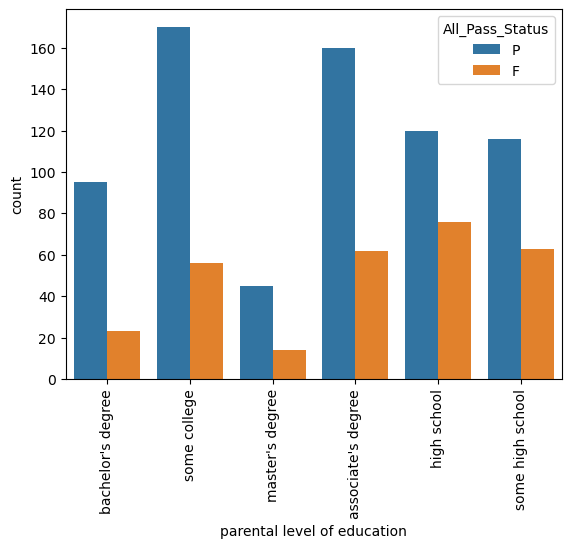

In [12]:
import seaborn as sns

graphA = sns.countplot(x='parental level of education', data=df, hue="All_Pass_Status")
_ = plt.setp(graphA.get_xticklabels(), rotation=90)

In [13]:
#ratio of parents with high school as highest education level
highSchool_count = (df['parental level of education']=='high school').sum()
highSchool_ratio = highSchool_count  / len(df.index)

#ratio of parents with unfinished high school
someHighSchool_count = (df['parental level of education']=='some high school').sum()
someHighSchool_ratio= someHighSchool_count / len(df.index)

someCollege_count = (df['parental level of education']=='some college').sum()

pass_array = np.where((df['parental level of education']=='high school') & (df['All_Pass_Status']=='P'), True, False)
pass_ratio = np.count_nonzero(pass_array == True) / highSchool_count
print('Students passed percentage whose parents finished high school: %.2f%%' % (pass_ratio*100))

Students passed percentage whose parents finished high school: 61.22%


In [14]:
pass_array = np.where((df['parental level of education']=='some high school') & (df['All_Pass_Status']=='P'), True, False)
pass_ratio = np.count_nonzero(pass_array == True) / someHighSchool_count
print('Students passed percentage whose parents finished some high school: %.2f%%' % (pass_ratio*100))

Students passed percentage whose parents finished some high school: 64.80%


#### Students whose parents finished high school had a score failure rate of 48.78%. For students whose parents only finished some high school, the score failure rate was 45.20%.

In [15]:
bachelor_count = (df['parental level of education'] == 'bachelor\'s degree').sum()
pass_array = np.where(((df['parental level of education'] == 'bachelor\'s degree') & (df['All_Pass_Status']=='P')), True, False)
pass_ratio = np.count_nonzero(pass_array == True) / bachelor_count
print('Students passed with parents with bachelor\'s degree: %.2f%%' % (pass_ratio*100))

Students passed with parents with bachelor's degree: 80.51%


In [16]:
associate_count = (df['parental level of education']=='associate\'s degree').sum()
pass_array = np.where(((df['parental level of education']=='associate\'s degree') & (df['All_Pass_Status']=='P')), True, False)
pass_ratio = np.count_nonzero(pass_array == True) / associate_count
print('Students passed with parents with associate\'s degree: %.2f%%' % (pass_ratio*100))

Students passed with parents with associate's degree: 72.07%


#### For students whose parents who finished with college (AS, BS), the passing rate significantly increased. For instance, students whose parents finished a bachelors degree had a 19.22% increase from the rate of students whose parents only finished high school. From a sociological viewpoint, the impact of a college degree correlates to the success of an individual in academic scores.

In [17]:
df['Two_Class_Pass'] = df.apply(lambda x: 'T' if (x.Passed_Math == 'P' and x.Passed_Reading == 'P') 
                        or (x.Passed_Math == 'P' and x.Passed_Writing == 'P') 
                        or (x.Passed_Reading == 'P' and x.Passed_Writing == 'P') else 'F', axis=1)

df['average of all scores'] = df.apply(lambda x: round((x['math score']+x['reading score']+x['writing score'])/3, 2), axis=1)

df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed_Math,Passed_Reading,Passed_Writing,All_Pass_Status,Two_Class_Pass,average of all scores
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,T,72.67
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,T,82.33
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,T,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,F,49.33
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,T,76.33


#### Let's consider a good academic standing where two classes passed AND at least 55 is the average of all scores is the benchmark.

In [18]:
percent_passed = (df['Two_Class_Pass']=='T').sum() / len(df.index)
print('Two Classes Passed Percentage: %.2f%%' % (percent_passed*100))
df['Two_Class_Pass'].value_counts()

Two Classes Passed Percentage: 82.30%


T    823
F    177
Name: Two_Class_Pass, dtype: int64

In [19]:
pass_average_count = (df['average of all scores'] >= 55).sum()
print("Students with passing average of all scores: %d" % (pass_average_count))

Students with passing average of all scores: 809


In [20]:
good_standing_ratio = (((df['Two_Class_Pass']=='T') & (df['average of all scores'] >= 55)).sum()) / (len(df.index))
print("Students with good academic standing: %.2f%%" % (good_standing_ratio*100))

Students with good academic standing: 80.50%


In [21]:
#student whose parents completed high school and have good academic standing
ratioA = ((df['parental level of education']=='high school') & (df['average of all scores'] >= 55) &
            (df['Two_Class_Pass']=='T')).sum() / highSchool_count

#student whose parents did not complete high school and have good academic standing
ratioB = ((df['parental level of education']=='some high school') & (df['average of all scores'] >= 55) &
            (df['Two_Class_Pass']=='T')).sum() / someHighSchool_count

ratioF = ((df['parental level of education'] =='some college') & (df['average of all scores'] >= 55) &
            (df['Two_Class_Pass']=='T')).sum() / someCollege_count

In [22]:
#students whose parents completed bachelors and have good academic standing
ratioC =((df['parental level of education']=='associate\'s degree') & (df['average of all scores'] >= 55) &
            (df['Two_Class_Pass']=='T')).sum() / associate_count

#students whose parents completed associate's and have a good academic standing
ratioD =((df['parental level of education']=='bachelor\'s degree') & (df['average of all scores'] >= 55) &
            (df['Two_Class_Pass']=='T')).sum() / bachelor_count

#students whose parents completed master's and have a good academic standing
master_count = (df['parental level of education']=='master\'s degree').sum()
ratioE =((df['parental level of education']=='master\'s degree') & (df['average of all scores'] >= 55) &
            (df['Two_Class_Pass']=='T')).sum() / master_count

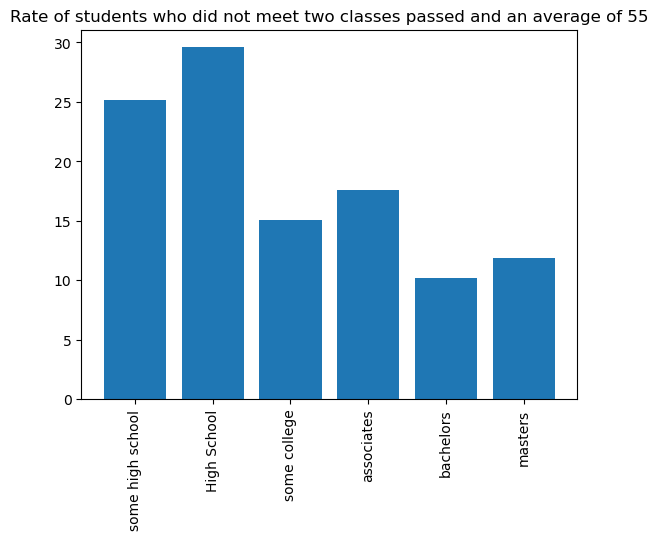

In [23]:
standing_comparison = [74.86, 70.41, 84.96, 82.43, 89.83, 88.14]
standing_comparison = [(100-i) for i in standing_comparison]
labels = ['some high school', 'High School','some college', 'associates', 'bachelors', 'masters']
standing_pos = np.arange(len(labels))

plt.bar(standing_pos, standing_comparison)
plt.xticks(standing_pos, labels, rotation=90)
plt.title("Rate of students who did not meet two classes passed and an average of 55")
plt.show()

In [24]:
print('Good Academic Standing whose parents finished some high school: %.2f%%' % (ratioB*100))
print('Good Academic Standing whose parents finished high school: %.2f%%' % (ratioA*100))
print('Good Academic Standing whose parents finished some college: %.2f%%' % (ratioF*100))
print('Good Academic Standing whose parents have associates: %.2f%%' % (ratioC*100))
print('Good Academic Standing whose parents have bachelors: %.2f%%' % (ratioD*100))
print('Good Academic Standing whose parents have masters: %.2f%%' % (ratioE*100))

Good Academic Standing whose parents finished some high school: 74.86%
Good Academic Standing whose parents finished high school: 70.41%
Good Academic Standing whose parents finished some college: 84.96%
Good Academic Standing whose parents have associates: 82.43%
Good Academic Standing whose parents have bachelors: 89.83%
Good Academic Standing whose parents have masters: 88.14%


[Text(0, 0, "bachelor's degree"),
 Text(1, 0, 'some college'),
 Text(2, 0, "master's degree"),
 Text(3, 0, "associate's degree"),
 Text(4, 0, 'high school'),
 Text(5, 0, 'some high school')]

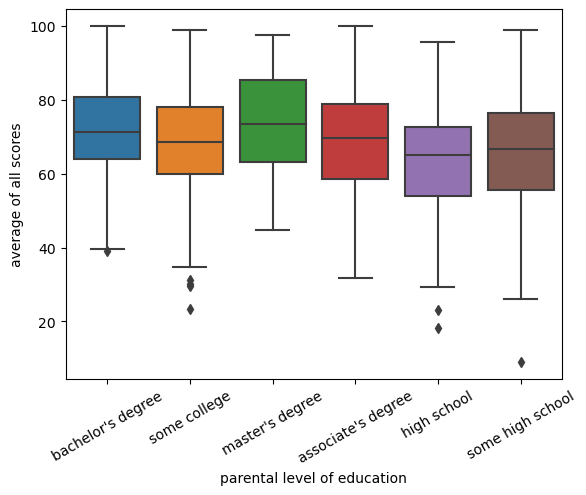

In [25]:
score_list = df.groupby('parental level of education')['average of all scores'].sum()

someHighSchool_average = score_list['some high school'] / someHighSchool_count
highSchool_average = score_list['high school'] / highSchool_count
someCollege_average = score_list['some college'] / someCollege_count
associate_average = score_list['associate\'s degree'] / associate_count
bachelor_average = score_list['bachelor\'s degree'] / bachelor_count
masters_average = score_list['master\'s degree'] / master_count

average_comparison = [someHighSchool_average, highSchool_average, someCollege_average, associate_average, bachelor_average,
                        masters_average]

graphC = sns.boxplot(x=df['parental level of education'], y=df['average of all scores'])
graphC.set_xticklabels(graphC.get_xticklabels(), rotation=30)

#### A study published by the U.S. Education Department’s National Center for Education Statistics revealed that 1/3 of first-generation students dropped out after three years in college, as compared to 14% of students whose parents have degrees.

##### SOURCE: U.S. Department of Education, National Center for Education Statistics, 2018 First-Generation Students: College Access, Persistence, and Postbachelor’s Outcomes

<Axes: title={'center': 'Ratio of free/reduced and standard lunch plans among students'}>

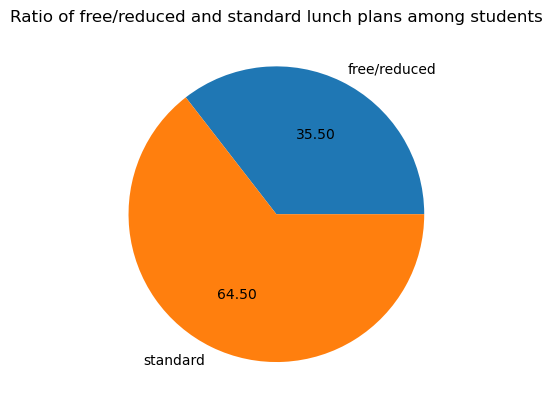

In [26]:
df.groupby('lunch').size().plot(kind='pie', title="Ratio of free/reduced and standard lunch plans among students",
                                autopct='%.2f')

#### The number of free/reduced lunch plans is a surprisingly higher at more than a 1/3 of students in the plan.

In [27]:
df_free = df[df['lunch']=='free/reduced']

df_free.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed_Math,Passed_Reading,Passed_Writing,All_Pass_Status,Two_Class_Pass,average of all scores
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,F,49.33
7,male,group B,some college,free/reduced,none,40,43,39,F,F,F,F,F,40.67
8,male,group D,high school,free/reduced,completed,64,64,67,P,P,P,P,T,65.00
9,female,group B,high school,free/reduced,none,38,60,50,F,P,F,F,F,49.33
17,female,group B,some high school,free/reduced,none,18,32,28,F,F,F,F,F,26.00


<Axes: title={'center': "distribution of parent's degree of education among free/reduced lunch plans"}>

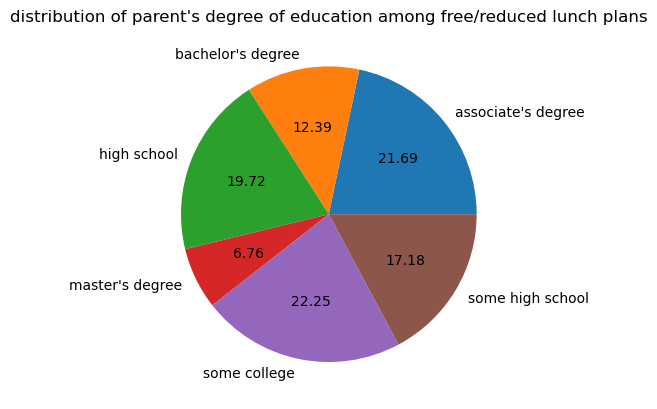

In [28]:
df_free.groupby('parental level of education').size().plot(kind='pie', 
                title = "distribution of parent's degree of education among free/reduced lunch plans", autopct='%.2f')

#### Students of parents with no degree (high school, some high school, some college) made up nearly 60% of the students under the free/reduced lunch plan. For students with parents of bachelors and masters, they constitute less 1/5 of the distribution.

In [30]:
test_prep = df[df['test preparation course']=='none']

test_prep.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed_Math,Passed_Reading,Passed_Writing,All_Pass_Status,Two_Class_Pass,average of all scores
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,T,72.67
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,T,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,F,49.33
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,T,76.33
5,female,group B,associate's degree,standard,none,71,83,78,P,P,P,P,T,77.33
7,male,group B,some college,free/reduced,none,40,43,39,F,F,F,F,F,40.67
9,female,group B,high school,free/reduced,none,38,60,50,F,P,F,F,F,49.33
10,male,group C,associate's degree,standard,none,58,54,52,P,F,F,F,F,54.67
11,male,group D,associate's degree,standard,none,40,52,43,F,F,F,F,F,45.00
12,female,group B,high school,standard,none,65,81,73,P,P,P,P,T,73.00


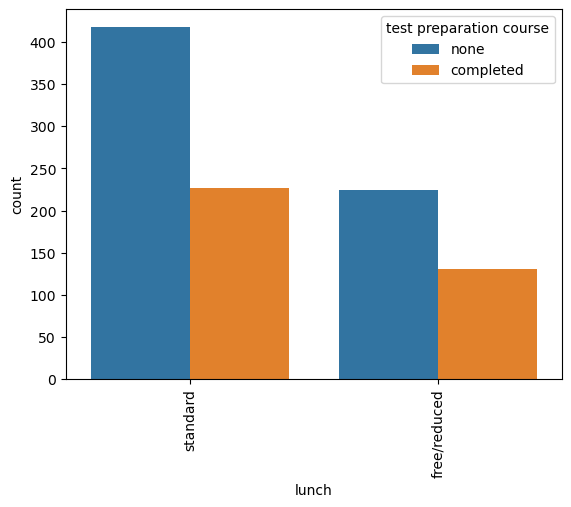

In [34]:
df[(df['test preparation course']=='none') & (df['lunch']=='free/reduced')]

graphB = sns.countplot(x='lunch', data=df, hue="test preparation course")
_ = plt.setp(graphB.get_xticklabels(), rotation=90)

#### There are more students with the standard lunch plan, but the ratio between the type of lunch plan they have and whether they took a test prep course does not have too much disparity.

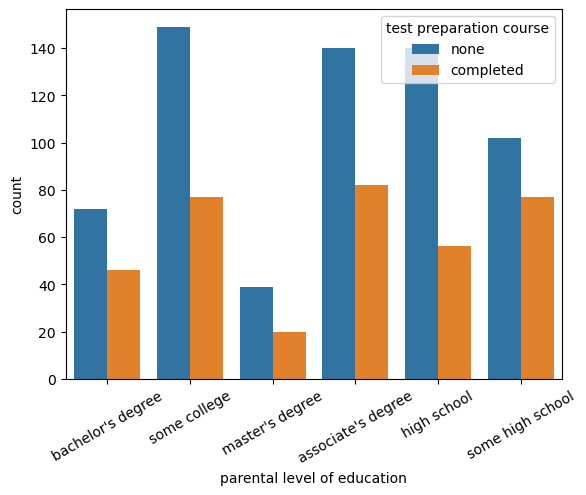

In [44]:
graphC = sns.countplot(x='parental level of education', data=df, hue="test preparation course")
_ = plt.setp(graphC.get_xticklabels(), rotation=30)

In [57]:
labels = ['some high school', 'high school','some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
for x in labels:
    ratio = (( (df['parental level of education']==x) & (df['test preparation course']=='none') ).sum()) / (df['parental level of education']==x).sum()
    print('Students who took prep course among others with similar parents with %s: %.2f%%' % (x, ratio*100))

Students who took prep course among others with similar parents with some high school: 56.98%
Students who took prep course among others with similar parents with high school: 71.43%
Students who took prep course among others with similar parents with some college: 65.93%
Students who took prep course among others with similar parents with associate's degree: 63.06%
Students who took prep course among others with similar parents with bachelor's degree: 61.02%
Students who took prep course among others with similar parents with master's degree: 66.10%


#### There are no obvious sentiments to be made based on the data and percentages above. Most students will avail the test preparation course, regardless of familial education level.

#### The study on socioeconomic relationships such as academic scores and familial degree of education is better suited for much larger data.

In [3]:
import numpy as np

matrix = np.random.randint(10, size=(3, 3))
print(matrix)

[[8 9 6]
 [8 8 9]
 [3 1 7]]


In [5]:
inverse_matrix = np.linalg.inv(matrix)
print(inverse_matrix)

[[ 2.47368421 -3.          1.73684211]
 [-1.52631579  2.         -1.26315789]
 [-0.84210526  1.         -0.42105263]]
